# U Map Generator

In [11]:
import numpy as np
from matplotlib import pyplot as plt

from helper import evaluate_map, generate_init_map, output_map_file, plot_map

# initialize map
rng_seed = 12345 # ! Seed
map_height = 100
map_width = map_height

init_map_np = generate_init_map(map_height=map_height, map_width=map_width)
rng = np.random.default_rng(rng_seed)

In [12]:
# map generation
map_np = init_map_np.copy()

partition_size = 7
threshold = 5

for bound_y in range(1, map_height - 1, partition_size):
    for bound_x in range(1, map_width - 1, partition_size):
        partition_np = map_np[bound_y:bound_y+partition_size, bound_x:bound_x+partition_size]
        skip_idx = rng.integers(4)

        if skip_idx != 0:
            partition_np[1:partition_size - 1, 1] = 1
        
        if skip_idx != 1:
            partition_np[1:partition_size - 1, partition_size - 2] = 1
        
        if skip_idx != 2:
            partition_np[1, 1:partition_size - 1] = 1
        
        if skip_idx != 3:
            partition_np[partition_size - 2, 1:partition_size - 1] = 1 

# fill spawn area
map_np[1:partition_size * 2, 1: partition_size * 2] = 0

In [13]:
# evaluation
avgCrossEntropy = evaluate_map(map_np=map_np)
print(f"Evaluation score is: {avgCrossEntropy:.3f}")

Evaluation score is: 0.668


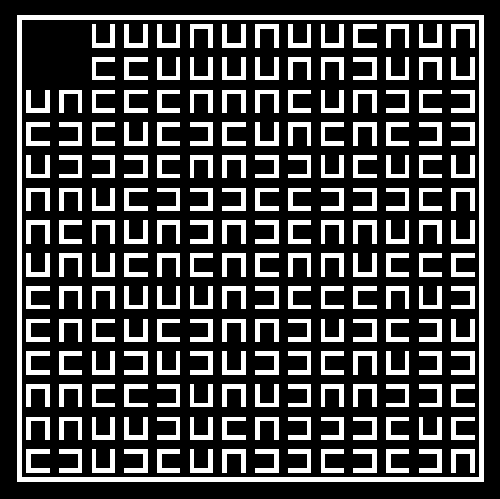

In [14]:
# visualize the map
plot_map(map_np=map_np, map_height=map_height,  map_width=map_width)

In [15]:
# output map
output_map_file(map_np=map_np, file_name=f'u_map_{rng_seed}.txt')
